In [12]:

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist

'''Load data'''
import compress_pickle
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
# min_pattern_len, true_data, fake_data_list = data

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

raw_data = []

correction_f = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/proofread_oob_grc_dendrites_210225'

correction_db = {}
with open(correction_f) as fin:
    for line in fin:
        grc_id, num = line.strip().split(' ')
        correction_db[grc_id] = int(num)

def count_per_grc(graph):
    count = defaultdict(int)
    for grc_id, grc in graph.grcs.items():
        num_claws = len(grc.edges)
        if grc_id in correction_db:
            if correction_db[grc_id] <= 2:
                num_claws += correction_db[grc_id]
            else:
                num_claws = correction_db[grc_id]
        count[num_claws] += 1
        if num_claws > 0:
            raw_data.append(num_claws)
    return count

true_count = count_per_grc(input_graph)

# print("Generating random graphs...")
# random_counts = []
# mf_dist_margin = 5000
# for i in range(5):
#     print(i)
#     input_graph.randomize_graph_by_mf(
#         mf_dist_margin=mf_dist_margin,
#         single_connection_per_pair=True,
#         preserve_in_degree=True,
#         # approximate_in_degree=True,
#         local_lengths=True,
#         )
#     random_counts.append(count_per_grc(input_graph))

compress_pickle.dump(
    raw_data,
    '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/'
    'grc_dendrite_count_dist_db_210225.gz')



In [15]:
for grc_id, grc in input_graph.grcs.items():
    print(grc_id)

grc_823
grc_1192
grc_1324
grc_1197
grc_847
grc_1039
grc_1023
grc_12
grc_1120
grc_383
grc_1207
grc_1398
grc_1170
grc_1118
grc_892
grc_1304
grc_940
grc_37
grc_41
grc_974
grc_422
grc_1021
grc_1013
grc_366
grc_24
grc_372
grc_353
grc_1258
grc_1281
grc_1190
grc_884
grc_983
grc_1100
grc_1291
grc_436
grc_1099
grc_193
grc_363
grc_1182
grc_1041
grc_1283
grc_1112
grc_421
grc_1052
grc_1113
grc_140
grc_1053
grc_1148
grc_605
grc_430
grc_1156
grc_347
grc_241
grc_35
grc_1203
grc_1338
grc_237
grc_381
grc_973
grc_1138
grc_1274
grc_966
grc_1217
grc_1164
grc_1161
grc_242
grc_28
grc_392
grc_1024
grc_1265
grc_1202
grc_393
grc_939
grc_1231
grc_876
grc_933
grc_1463
grc_231
grc_351
grc_6
grc_439
grc_857
grc_5
grc_30
grc_399
grc_391
grc_1204
grc_1060
grc_1189
grc_1122
grc_805
grc_1214
grc_1224
grc_382
grc_1336
grc_1193
grc_1211
grc_998
grc_1059
grc_413
grc_4
grc_1302
grc_1107
grc_173
grc_1063
grc_409
grc_1343
grc_1047
grc_209
grc_883
grc_25
grc_1249
grc_976
grc_36
grc_1195
grc_1185
grc_1049
grc_349
grc_441
grc_

In [18]:
print(input_graph.grcs['grc_347'].edges)

[('mf_51', (370266, 426392, 8526)), ('mf_277', (344294, 410793, 15608)), ('mf_107', (358750, 408958, 10246)), ('mf_79', (378029, 409702, 27784))]


In [4]:

script_n = 'claws_per_grc_210225'
import compress_pickle
compress_pickle.dump((
    true_count,
    # random_counts,
    ), f"{script_n}_data.gz")



In [8]:

import statistics
median = statistics.median(raw_data)
mean = statistics.mean(raw_data)
stdev = statistics.stdev(raw_data, mean)
print(f'median: {median}, Mean: {mean}, std: {stdev}, len: {len(raw_data)}')


median: 4.0, Mean: 4.381918819188192, std: 0.9990224468048978, len: 542


Height: 2.4, Aspect: 1.25


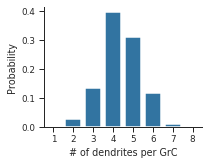

In [23]:

mpd = MyPlotData()

max_claws = max(true_count.keys())

for num_claws in range(max_claws+1):
    if num_claws == 0:
        continue
    mpd.add_data_point(
        kind='Data',
        num_claws=num_claws,
        count=true_count[num_claws],
        )

mpd = mpd.to_pdf('count')

importlib.reload(my_plot); my_plot.my_catplot(
    mpd, y='count', x='num_claws',
    hue='kind',
    kind='bar',
    context='paper',
    # y='ratio', y_lims=[.25, .75], context='paper', kind='violin',
    font_scale=1,
#     height=4,
    width=3,
    aspect=1.25,
    y_axis_label='Probability',
    legend=False,
    x_axis_label='# of dendrites per GrC',
    save_filename=f'{script_n}.svg',
    show=True,
    )

